Задачи для Анализа:

Распределение Показов и Кликов:

Рассчитать среднее количество показов и кликов на объявление за весь период (округлить до целых).
Построить график распределения показов на объявление за весь период.
Скользящее Среднее Показов:

Вычислить скользящее среднее показов с окном 2 для 6 апреля 2019 года (округлить до целых).
Анализ Аномалий:

Нанести на график значения арифметического среднего по дням и скользящего среднего количества показов.
Определить день с наибольшей разницей (по модулю) между арифметическим средним и скользящим средним (не учитывая дни со значением скользящего среднего NaN).
Написать функцию для нахождения объявления с наибольшим/наименьшим количеством показов в этот день.
Анализ Рекламных Клиентов:

Рассчитать среднее количество дней от даты создания рекламного клиента до первого запуска рекламного объявления.
Вычислить конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней (в процентах, округлить до сотых).
Сегментация Клиентов:

Разбить клиентов на промежутки от создания до запуска рекламного объявления (в днях).
Определить, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).
Вывести на интерактивный график категории с количеством уникальных клиентов в них.
Описание Данных:

----
ads_data.csv:

date – дата

time – время

event – действие (просмотр/клик)

platform – платформа

ad_id – id объявления

client_union_id – id рекламного кабинета

campaign_union_id – id рекламной кампании

ad_cost_type – тип оплаты

ad_cost – цена

has_video – наличие видео

target_audience_count – размер аудитории

-------
ads_clients_data.csv:

date – дата

client_union_id – id рекламного кабинета

community_id – id сообщества

create_date – дата создания рекламного клиента

1) 
Рассчитать среднее количество рекламных событий (показов и кликов) по объявлениям.

Учесть объявления без кликов при группировке данных.

Округлить ответы до целых чисел.

In [3]:
import pandas as pd
abs_data = pd.read_csv('ads_data.csv')
abs_data['event'].fillna(0, inplace=True)
abs_data_grouped = abs_data.groupby('ad_id')\
    ['event'].value_counts().unstack().fillna(0)
average_clicks = abs_data_grouped['click'].mean()
average_views = abs_data_grouped['view'].mean()
print('Среднее количество кликов на объявление', round(average_clicks),'. Среднее количество показов на объявление', round(average_views),'.')

Среднее количество кликов на объявление 113 . Среднее количество показов на объявление 923 .


2) Прологарифмировать число показов с использованием функции np.log.

Построить график распределения с помощью sns.distplot, используя логарифмированные данные.

Настроить параметры графика для улучшения читаемости и восприятия.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


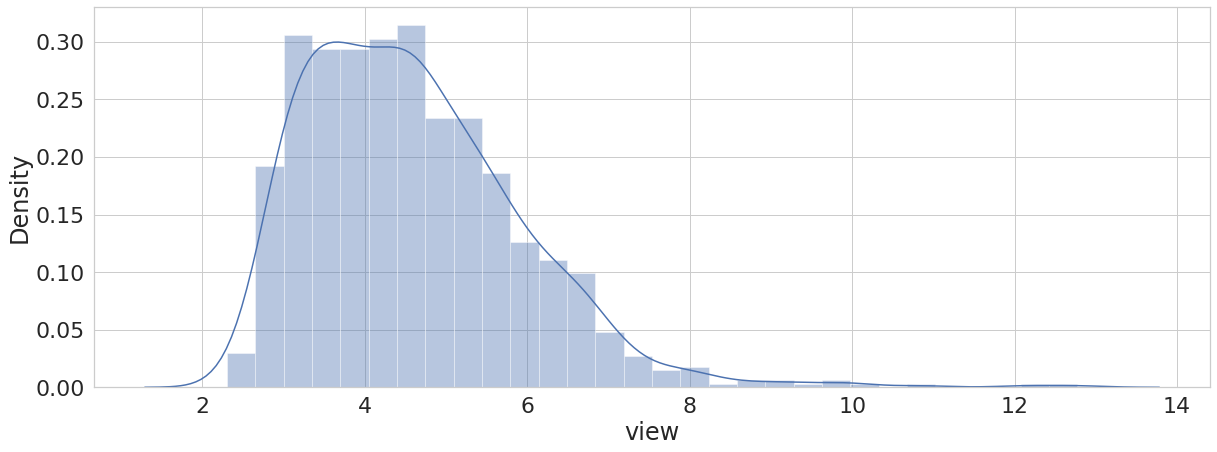

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
abs_data = pd.read_csv('ads_data.csv')
abs_data['event'].fillna(0, inplace=True)
abs_data_grouped = abs_data.groupby('ad_id')\
    ['event'].value_counts().unstack().fillna(0).reset_index()

abs_data_grouped_log = np.log(abs_data_grouped['view'][abs_data_grouped['view'] > 0])

sns.distplot(abs_data_grouped_log)

3) Рассчитать среднее количество показов на 1 объявление (ad_id) по дням.

Выполнить скользящее среднее по полученным результатам с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получится за 6 апреля 2019 года? Ответ округлить до целого числа.

In [7]:
import pandas as pd

abs_data = pd.read_csv('ads_data.csv')
abs_data['date'] = pd.to_datetime(abs_data.date)
abs_data_view = abs_data[abs_data['event'] == 'view']
abs_data_group = abs_data_view.groupby(['ad_id','date'])\
    ['event'].count().reset_index(name='count')

day_count = abs_data_group.groupby('date')['count'].mean()

abs_data_group_CR = day_count.rolling(2).mean()

date_ser = pd.to_datetime('2019-04-06')
value = round(abs_data_group_CR[abs_data_group_CR.index.date == date_ser.date()])
value

date
2019-04-06    598.0
Name: count, dtype: float64

4) Использовать библиотеку seaborn (sns) и функцию sns.lineplot для построения графика.

Вычислить разницу по модулю между арифметическим и скользящим средним.

Определить день, в который наблюдается наибольшая разница по модулю (не учитывая дни с NaN в скользящем среднем).

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


date
2019-04-01           NaN
2019-04-02      8.347644
2019-04-03     13.082898
2019-04-04    255.974471
2019-04-05    121.603979
2019-04-06    320.993475
Name: count, dtype: float64


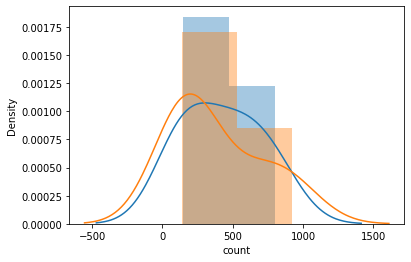

In [12]:
import pandas as pd
import seaborn as sns


abs_data = pd.read_csv('ads_data.csv')
abs_data['date'] = pd.to_datetime(abs_data.date)
abs_data_view = abs_data[abs_data['event'] == 'view']
abs_data_group = abs_data_view.groupby(['ad_id','date'])\
    ['event'].count().reset_index(name='count')

day_count = abs_data_group.groupby('date')['count'].mean()

abs_data_group_CR = day_count.rolling(2).mean()

abs_delta = abs(day_count-abs_data_group_CR)


sns.distplot(abs_data_group_CR)
sns.distplot(day_count)
print(abs_delta)


5) Найти среднее количество дней от даты создания рекламного клиента до первого запуска рекламного объявления.

In [39]:
import pandas as pd
import seaborn as sns


abs_data = pd.read_csv('ads_data.csv')
abs_clients_data = pd.read_csv('ads_clients_data.csv')

result = pd.merge(abs_data, abs_clients_data, on='client_union_id')
result['date_x'] = pd.to_datetime(result.date_x)
result['create_date'] = pd.to_datetime(result.create_date)

result['time_delta'] = (result.date_x - result.create_date)

min_time = result.groupby('client_union_id')['time_delta'].min()


day_count = min_time.mean()


day_count

Timedelta('124 days 09:04:43.532219570')

6) Для расчета конверсии из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней выполнить следующие шаги:

Выбрать только те записи, где прошло не более 365 дней от создания рекламного кабинета до запуска первой рекламы.

Рассчитать отношение числа клиентов, которые запустили рекламу, к общему числу клиентов.

Преобразовать результат в проценты и округлить до сотых.

In [8]:
import pandas as pd
import seaborn as sns


abs_data = pd.read_csv('ads_data.csv')
abs_clients_data = pd.read_csv('ads_clients_data.csv')


result = pd.merge(abs_data, abs_clients_data, on='client_union_id')
result['date_x'] = pd.to_datetime(result.date_x)
result['create_date'] = pd.to_datetime(result.create_date)

result['time_delta'] = (result.date_x - result.create_date)

min_time = result.groupby('client_union_id')['time_delta'].min()
filtred = (min_time < pd.Timedelta(365, unit='day')).count()

df = abs_clients_data['client_union_id'].nunique()

finish = (filtred/df)*100
round(finish, 2)

0.69

7) Сегментация Клиентов по Промежуткам времени:

Для разбиения клиентов на группы в зависимости от времени от создания рекламного кабинета до запуска первого рекламного объявления предлагается использовать функцию pd.cut() и метод value_counts() для определения количества уникальных клиентов в каждом временном промежутке.

In [19]:
import pandas as pd
import seaborn as sns


abs_data = pd.read_csv('ads_data.csv')
abs_clients_data = pd.read_csv('ads_clients_data.csv')

result = pd.merge(abs_data, abs_clients_data, on='client_union_id')
result['date_x'] = pd.to_datetime(result.date_x)
result['create_date'] = pd.to_datetime(result.create_date)

result['time_delta'] = (result.date_x - result.create_date)

min_time = result.groupby('client_union_id')['time_delta'].min().reset_index()

min_time['time_category'] = pd.cut(min_time['time_delta'], bins=pd.to_timedelta(['0d', '30d', '90d', '180d', '365d']))
end = min_time['time_category'].value_counts()
end



(90 days 00:00:00, 180 days 00:00:00]     396
(30 days 00:00:00, 90 days 00:00:00]      263
(180 days 00:00:00, 365 days 00:00:00]    168
(0 days 00:00:00, 30 days 00:00:00]        11
Name: time_category, dtype: int64